# WiDS Maastricht Datathon

# Background #
Created by [Chang Sun](https://www.linkedin.com/in/chang-sun-maastricht/), [Andreea Grigorio](https://www.linkedin.com/in/andreea-grigoriu/), [Yenisel Plasencia Calaña](https://www.linkedin.com/in/yenisel-plasencia-cala%C3%B1a-phd-10144190/).

> ***What is ICU and why prediction models are needed in the ICU?***

The ICU is designed to care for patients who are seriously injured, have a critical or life-threatening illness, or have undergone a major surgical procedure, therefore requiring 24-hour care and monitoring. Medical professionals in the ICU usually need to make high-stakes, difficult, emotive decisions with limited patient information, high uncertainty about outcomes and extreme pressure. It is dramatically challenging for medical professionals to integrate all the dynamic measurements from the devices in a short time and combine their experience and beliefs to make a quick decision without knowing the medical history of the patient. Using machine learning models that are trianed on preivous ICU data will allow medical professionals to combine the temporal predictions with their existing beliefs to facilitate decision making.

The following figure presents how machine learning models can be trained on previous ICU data and and applied to new individual patiens. This figure is from this [paper](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(20)30018-2/fulltext) published in 2020.

<img src="https://els-jbs-prod-cdn.jbs.elsevierhealth.com/cms/asset/3318d4c4-2ecd-4d9c-9f1d-2eb877f3f634/gr1.jpg" width="600">

> ***Why is it important to identify patient with diabetes in the ICU***

Many studies have observed that patients who do not know they have diabetes when hospitalized in an ICU have greater complications during their stay and poorer outcomes than patients without diabetes [(Ref)](https://news.emory.edu/stories/2015/12/coopersmith_unknown_diabetes_in_ICU_study/index.html). In the recent COVID-19 pandemic, people with diabetes have a high risk to require ICU admission. Probably they are not exposed to higher risk of being infected, however, in the case, particularly when the metabolic control is not sufficient, they are more prone to serious complications and to die. Therefore, it’s critical for medical professionals to identify diabetes so that a patient can be appropriately treated.


> ***About Diabetes***

Diabetes is a disease in which your blood glucose, or blood sugar, levels are too high. Glucose comes from the foods you eat. Insulin is a hormone that helps the glucose get into your cells to give them energy. With type 1 diabetes, your body does not make insulin. With type 2 diabetes, the more common type, your body does not make or use insulin well.

In this dataset, the target feature - diabetes_mellitus is a binary featuers (yes or no). However, in fact, there are three main types of diabetes mellitus so that patients might have very different symptoms but all labeled as diabetes patients (in this dataset). 

<img src="https://www.who.int/images/default-source/departments/ncds/diabetes/whd2016-diabetes-infographic-v2-page-1.png?sfvrsn=a5638d91_2" width="500">


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/widsdatathon2021/SampleSubmissionWiDS2021.csv
/kaggle/input/widsdatathon2021/SolutionTemplateWiDS2021.csv
/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv
/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv
/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv


In [2]:
# Use Jupyter Widges Package - https://ipywidgets.readthedocs.io/en/stable/index.html 
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual, Layout
import ipywidgets as widgets
style = {'description_width': 'initial'}

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 300)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  import sys


# Load training/test data

In [3]:
icu_data_path_training = "/kaggle/input/widsdatathon2021/TrainingWiDS2021.csv"
icu_data_path_test = "/kaggle/input/widsdatathon2021/UnlabeledWiDS2021.csv"
data_dictionary_path = "/kaggle/input/widsdatathon2021/DataDictionaryWiDS2021.csv"

df_training = pd.read_csv(icu_data_path_training, index_col=0) ### index_col ###
df_test = pd.read_csv(icu_data_path_test, index_col=0)
data_dictionary_df = pd.read_csv(data_dictionary_path, index_col=0)

In [4]:
search_column_name = 'Variable Name'
# You can also use:'Variable Name','Category','Data Type','Unit of Measure' for search_column_name

### Print the selected data rows ###
def f(x):
    return data_dictionary_df[data_dictionary_df[search_column_name].isin(list(x))]

### Multiple selection widgets ###
widget_variable=widgets.SelectMultiple(
    options=data_dictionary_df[search_column_name].unique(),
    layout=Layout(width='35%', height='150px'),
    description=search_column_name, 
    style = style
)
interact(f, x=widget_variable);

,Variable Name,Unit of Measure,Data Type,Description,Example
Category,,,,,


In [5]:
print(df_training.shape) #dataset number of rows and columns

(130157, 180)


In [6]:
print(df_test.shape) #dataset number of rows and columns

(10234, 179)


In [7]:
print(data_dictionary_df['Data Type'].unique())
data_dictionary_df.head()

['integer' 'numeric' 'string' 'binary']


,Variable Name,Unit of Measure,Data Type,Description,Example
Category,,,,,
identifier,encounter_id,None,integer,Unique identifier associated with a patient unit stay,None
identifier,hospital_id,None,integer,Unique identifier associated with a hospital,None
demographic,age,Years,numeric,The age of the patient on unit admission,None
demographic,bmi,kilograms/metres^2,string,The body mass index of the person on unit admission,21.5
demographic,elective_surgery,None,binary,Whether the patient was admitted to the hospital for an elective surgical operation,0


In [8]:
# Dropping variable that is not in the other sets
data_dictionary_df.drop(data_dictionary_df[data_dictionary_df['Variable Name'] == 'icu_admit_type'].index, inplace=True)

## Plotting categorical variables 
Visualization was inspired by notebook: <[WiDS Datathon 2021: RAPIDS+XGB](http://www.kaggle.com/ruchi798/wids-datathon-2021-rapids-xgb/notebook)> 

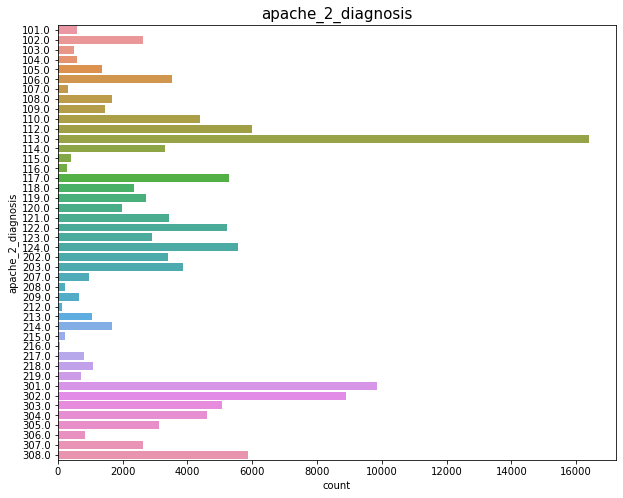

In [9]:
def count_plot(var, df_training): 
    plt.figure(figsize = (10,8)) 
    ax = sns.countplot(y = var, data = df_training) 
    plt.title(var, size = 15)

def inter_cat_plot(x): return count_plot(x, df_training)

### Multiple selection widgets ###
widget_cat_plot=widgets.Dropdown(
    options=data_dictionary_df[data_dictionary_df['Data Type'] =='string']['Variable Name'],
    value='apache_2_diagnosis',
    description="Categorical Variable:", 
    style = style
)
interact(inter_cat_plot, x=widget_cat_plot);

## Plot binary variables #

In [10]:

!pip install pywaffle

     |████████████████████████████████| 526 kB 412 kB/s 
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


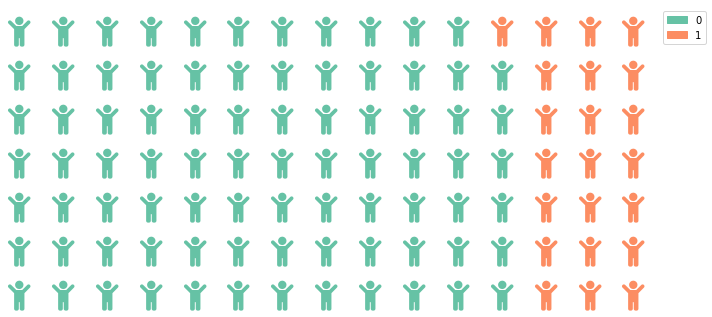

In [11]:
from pywaffle import Waffle

def binary_plot(var, df_training):
    binary_fig=plt.figure(
        figsize=(10, 8),
        FigureClass=Waffle,
        rows=7,
        columns=15,
        icons='child',
        values=dict(df_training[var].value_counts()),
        font_size=30,
#         rounding_rule='floor',
        legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)}
    )

def inter_binary_plot(x):
    return binary_plot(x, df_training)

### Multiple selection widgets ###
widget_binary_plot=widgets.Dropdown(
    options=data_dictionary_df[data_dictionary_df['Data Type'] =='binary']['Variable Name'],
    description="Binary Variable:", 
    style = style
)
interact(inter_binary_plot, x=widget_binary_plot);

## Plotting numerical variables

In [12]:
def hist(x,title):
    plt.figure(figsize = (10,8))
    ax = sns.distplot(x, kde=False);
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches, colors):
        rec.set_color(col)
    plt.title(title, size = 15)

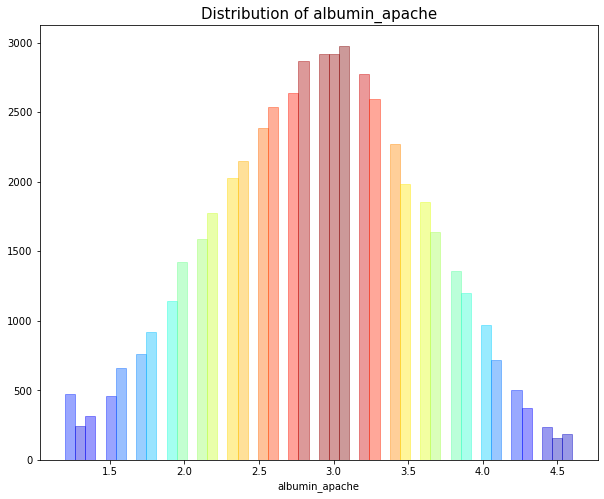

In [13]:
def inter_num_plot(x):
    return hist(df_training[x],'Distribution of %s' %x)

### Multiple selection widgets ###
widget_numeric_plot=widgets.Dropdown(
    options=data_dictionary_df[data_dictionary_df['Data Type'] =='numeric']['Variable Name'],
    description="Numeric Variable:", 
    style = style
)
interact(inter_num_plot, x=widget_numeric_plot);

Most distributions are bell-shaped and skewed.

## Correlation Matrix 

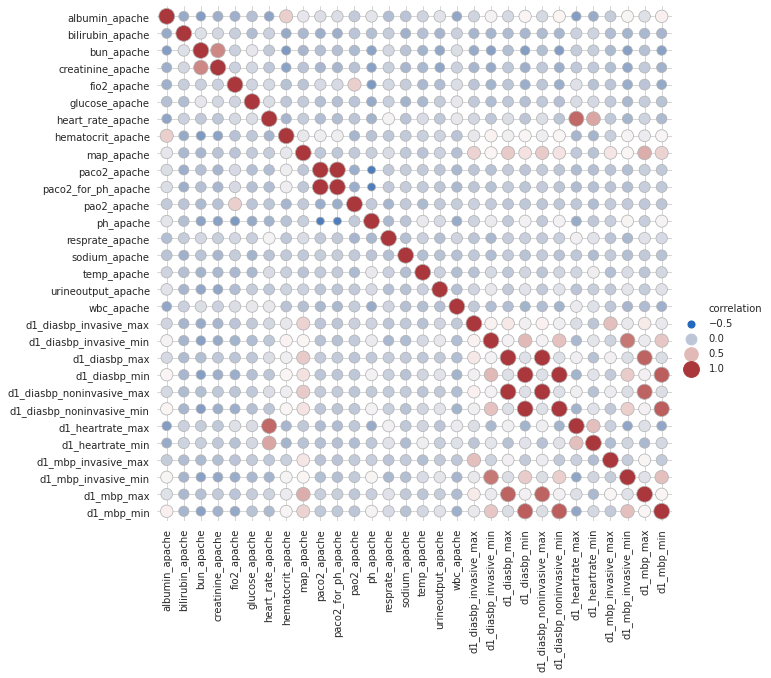

In [14]:
part_of_df = df_training[data_dictionary_df[data_dictionary_df['Data Type'] =='numeric']['Variable Name'][0:30]]

def corr_plot(input_df):
    # Compute a correlation matrix and plot it into a heatmap
    corr_df = input_df.corr()
    corr_mat = corr_df[corr_df.columns[::-1]].stack().reset_index(name="correlation")

    # Draw each cell as a scatter point with varying size and color
    sns.set_style("whitegrid")
    g = sns.relplot(
        data=corr_mat,
        x="level_0", y="level_1", hue="correlation", size="correlation",
        palette="vlag", edgecolor=".7",
        height=10, sizes=(50, 250), hue_norm=(-0.5, 1),size_norm=(-0.5, 1), 
    )

    # Tweak the figure to finalize
    g.set(xlabel="", ylabel="", aspect="equal")
    g.despine(left=True, bottom=True)
    g.ax.margins(.02)
    for label in g.ax.get_xticklabels():
        label.set_rotation(90)

corr_plot(part_of_df)

Some features are highly correlated.

## Target variable

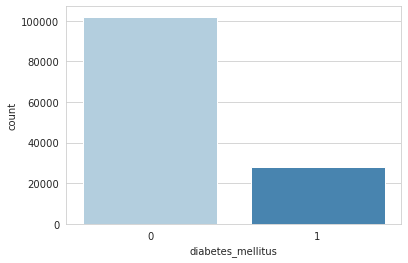

In [15]:
sns.countplot(df_training['diabetes_mellitus'], palette='Blues');

We have an imbalanced class problem.

## Checking Important Features

Main factors associated to Diabetes: weight, BMI, glucose levels, hypertension...

**Features selected:** 

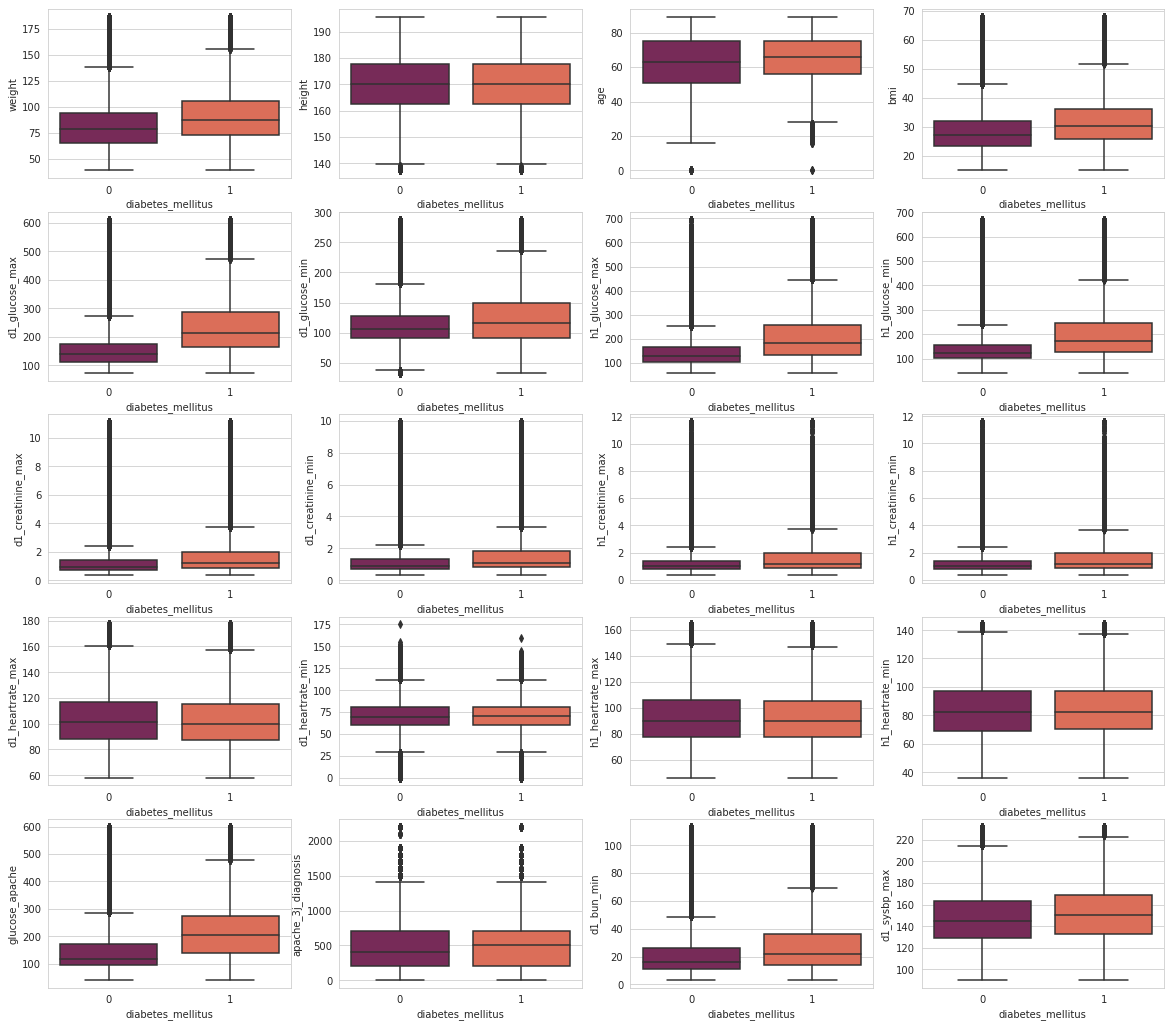

In [16]:
plt.figure(figsize=(20,18))

plt.subplot(5,4,1)
sns.boxplot(y="weight", x="diabetes_mellitus", data=df_training, palette='rocket')
        
plt.subplot(5,4,2)
sns.boxplot(y="height", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,3)
sns.boxplot(y="age", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,4)
sns.boxplot(y="bmi", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,5)
sns.boxplot(y="d1_glucose_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,6)
sns.boxplot(y="d1_glucose_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,7)
sns.boxplot(y="h1_glucose_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,8)
sns.boxplot(y="h1_glucose_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,9)
sns.boxplot(y="d1_creatinine_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,10)
sns.boxplot(y="d1_creatinine_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,11)
sns.boxplot(y="h1_creatinine_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,12)
sns.boxplot(y="h1_creatinine_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,13)
sns.boxplot(y="d1_heartrate_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,14)
sns.boxplot(y="d1_heartrate_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,15)
sns.boxplot(y="h1_heartrate_max", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,16)
sns.boxplot(y="h1_heartrate_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,17)
sns.boxplot(y="glucose_apache", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,18)
sns.boxplot(y="apache_3j_diagnosis", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,19)
sns.boxplot(y="d1_bun_min", x="diabetes_mellitus", data=df_training, palette='rocket')

plt.subplot(5,4,20)
sns.boxplot(y="d1_sysbp_max", x="diabetes_mellitus", data=df_training, palette='rocket')


## Checking categorical features

In [17]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

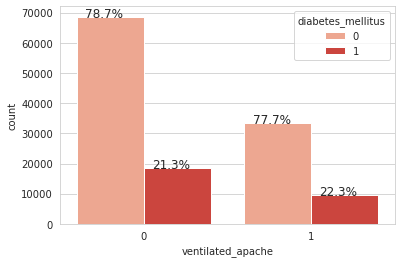

In [18]:
ax = sns.countplot(data=df_training, x='ventilated_apache', hue='diabetes_mellitus', palette='Reds')

with_hue(ax, df_training['ventilated_apache'], 2, 2)

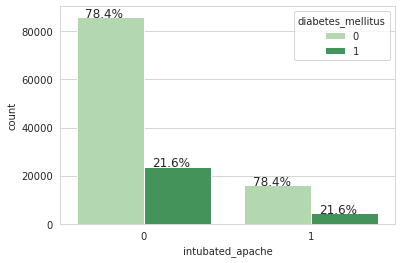

In [19]:
ax = sns.countplot(data=df_training, x='intubated_apache', hue='diabetes_mellitus', palette='Greens')

with_hue(ax, df_training['intubated_apache'], 2, 2)

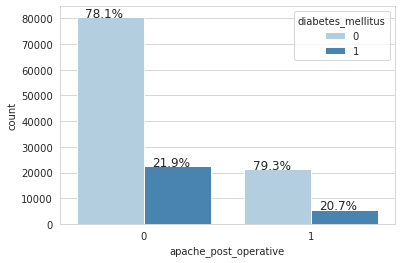

In [20]:
ax = sns.countplot(data=df_training, x='apache_post_operative', hue='diabetes_mellitus', palette='Blues')

with_hue(ax, df_training['apache_post_operative'], 2, 2)

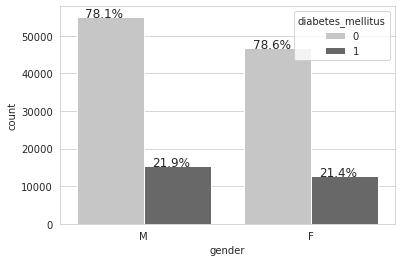

In [21]:
ax = sns.countplot(data=df_training, x='gender', hue='diabetes_mellitus', palette='Greys')

with_hue(ax, df_training['gender'], 2, 2)

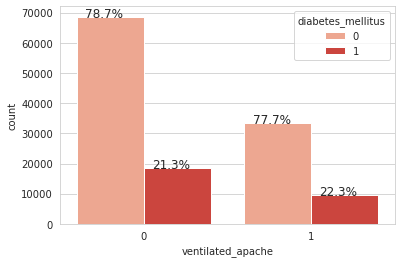

In [22]:
ax = sns.countplot(data=df_training, x='ventilated_apache', hue='diabetes_mellitus', palette='Reds')

with_hue(ax, df_training['ventilated_apache'], 2, 2)

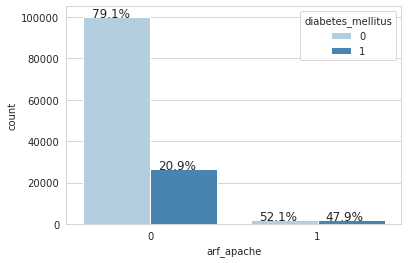

In [23]:
ax = sns.countplot(data=df_training, x='arf_apache', hue='diabetes_mellitus', palette='Blues')

with_hue(ax, df_training['arf_apache'], 2, 2)

## Check missing values in each variable

In [24]:
### check if there is any missing value in the dataset ###
def check_missing(df, col):
    missing  = 0
    misVariables = []
    CheckNull = df.isnull().sum()
    for var in range(0, len(CheckNull)):
        misVariables.append([col[var], CheckNull[var], round(CheckNull[var]/len(df),3)])
        missing = missing + 1

    if missing == 0:
        print('Dataset is complete with no blanks.')
    else:
        df_misVariables = pd.DataFrame.from_records(misVariables)
        df_misVariables.columns = ['Variable', 'Missing', 'Percentage']
        s = df_misVariables.sort_values(by=['Percentage'], ascending=False).style.bar(subset=['Percentage'], color='#d65f5f')
        display(s)
    return df_misVariables
        
ranked_df_missing_value = check_missing(df_training, df_training.columns)

,Variable,Missing,Percentage
128,h1_bilirubin_max,119861,0.921000
129,h1_bilirubin_min,119861,0.921000
126,h1_albumin_max,119005,0.914000
127,h1_albumin_min,119005,0.914000
146,h1_lactate_max,118467,0.910000
147,h1_lactate_min,118467,0.910000
170,h1_pao2fio2ratio_max,113397,0.871000
171,h1_pao2fio2ratio_min,113397,0.871000
167,h1_arterial_ph_min,107849,0.829000
166,h1_arterial_ph_max,107849,0.829000


## Handling missing values ##

In [25]:
### Take all variables which has less than 60% missing values ###

df_training_partial = df_training[ranked_df_missing_value[ranked_df_missing_value['Percentage']< 0.6]['Variable']]
df_test_partial = df_test[ranked_df_missing_value[ranked_df_missing_value['Percentage']<0.6]['Variable'][:-1]]

print("Original training dataset shape:", df_training.shape)
print("After removing missing columns:", df_training_partial.shape)
print("Original test dataset shape:", df_test.shape)
print("After removing missing columns:", df_test_partial.shape)

Original training dataset shape: (130157, 180)
After removing missing columns: (130157, 113)
Original test dataset shape: (10234, 179)
After removing missing columns: (10234, 112)


In [26]:
df_training_partial = df_training_partial.drop(columns=['encounter_id', 'hospital_id'], axis=1)
df_test_partial = df_test_partial.drop(columns=['encounter_id', 'hospital_id'], axis=1)

In [27]:
# Joining training and test sets

df_training_partial['label'] = 1
df_test_partial['label'] = 0

train_test = pd.concat([df_training_partial, df_test_partial]).reset_index(drop=True)

### Removing outliers detected in the previous steps

In [28]:
## Age
train_test.loc[train_test.age < 10, 'age'] = np.nan

## d1_heartrate_min >= 160
train_test.loc[train_test.d1_heartrate_min >= 160, 'd1_heartrate_min'] = np.nan

### Imputing Missing Data

In [29]:
from sklearn.impute import SimpleImputer

In [30]:
## Imputing categorical data

categorical_cols = ['ethnicity', 'gender','hospital_admit_source', 'icu_admit_source',
                   'icu_stay_type', 'icu_type', 'icu_id']

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') 

for i, v in enumerate(categorical_cols):
    train_test[v] = imp.fit_transform(train_test[v].values.reshape(-1,1))

In [31]:
## Imputing numerical data, except for 'height' and 'weight'

numerical_cols = train_test.drop(columns=['ethnicity', 'gender','hospital_admit_source', 'icu_admit_source',
                   'icu_stay_type', 'icu_type', 'icu_id', 'height', 'weight'], axis=1)

imp_num = SimpleImputer(missing_values=np.nan, strategy='median') 

for i, v in enumerate(numerical_cols):
    train_test[v] = imp_num.fit_transform(train_test[v].values.reshape(-1,1))

Text(0.5, 1.0, 'Kernel density estimation of weight for males and females')

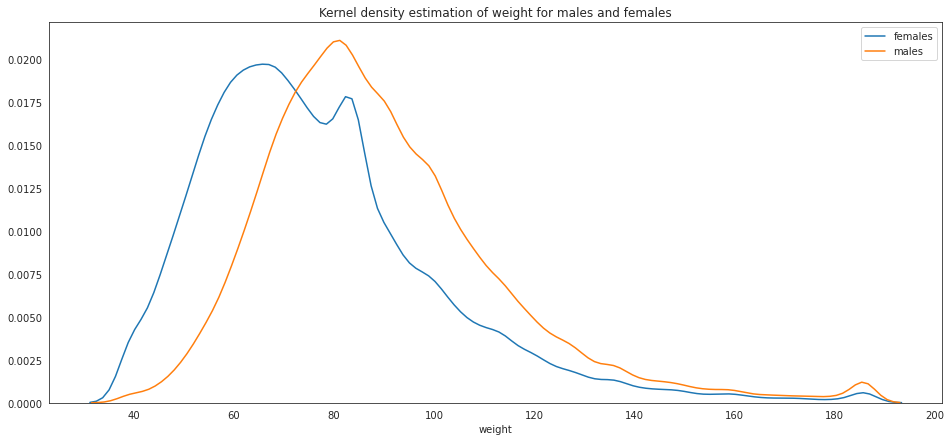

In [32]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 7))
mean = df_training['weight'].mean()
sns.distplot(
    df_training[df_training['gender'] == 'F']['weight'].fillna(mean),
    kde=True,
    hist=False,
    ax=ax,
    label='females'
)
sns.distplot(
    df_training[df_training['gender'] == 'M']['weight'],
    kde=True,
    hist=False,
    ax=ax,
    label='males'
)
plt.title('Kernel density estimation of weight for males and females')

Text(0.5, 1.0, 'Kernel density estimation of height for males and females')

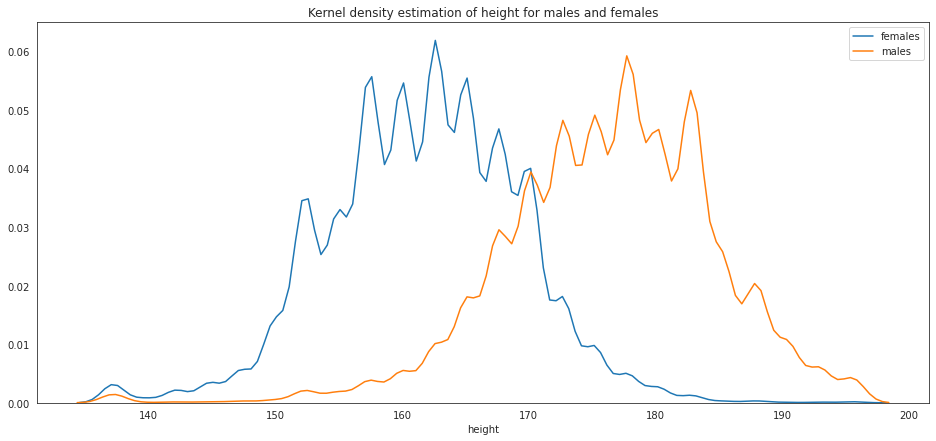

In [33]:
sns.set_style('white')
fig, ax = plt.subplots(figsize=(16, 7))
mean = df_training['height'].mean()
sns.distplot(
    df_training[df_training['gender'] == 'F']['height'].fillna(mean),
    kde=True,
    hist=False,
    ax=ax,
    label='females'
)
sns.distplot(
    df_training[df_training['gender'] == 'M']['height'],
    kde=True,
    hist=False,
    ax=ax,
    label='males'
)
plt.title('Kernel density estimation of height for males and females')

In [34]:
## Imputing 'height' and 'weight' according to gender

height_weight = ['height', 'weight']

for i, v in enumerate(height_weight):
    train_test[v] = train_test.groupby('gender')[v].transform(lambda grp: grp.fillna(grp.median()))

In [35]:
print("The missing values in the dataset are:", train_test.isnull().sum()) 

The missing values in the dataset are: age                            0
bmi                            0
elective_surgery               0
ethnicity                      0
gender                         0
height                         0
hospital_admit_source          0
icu_admit_source               0
icu_id                         0
icu_stay_type                  0
icu_type                       0
pre_icu_los_days               0
readmission_status             0
weight                         0
apache_2_diagnosis             0
apache_3j_diagnosis            0
apache_post_operative          0
arf_apache                     0
bun_apache                     0
creatinine_apache              0
gcs_eyes_apache                0
gcs_motor_apache               0
gcs_unable_apache              0
gcs_verbal_apache              0
glucose_apache                 0
heart_rate_apache              0
hematocrit_apache              0
intubated_apache               0
map_apache                     0
resp

## Feature Engineering

In [36]:
def get_bmi_category(bmi):
    if bmi != bmi:  # NaN
        return np.nan
    elif bmi < 18.5:  # Underweight
        return 'Underweight'
    elif bmi < 25:  # Healthy weight
        return 'Healthy weight'
    elif bmi < 30:  # Overweight
        return 'Overweight'
    else:  # Obese
        return 'Obese'    
    

train_test["bmi_cat"] = train_test["bmi"].apply(get_bmi_category)


train_test["bmi_cat"] = train_test["bmi_cat"].fillna(train_test["bmi_cat"].value_counts().index[0])

In [37]:
train_test['bmi_cat'].value_counts()

Obese             49688
Overweight        45477
Healthy weight    39529
Underweight       5697 
Name: bmi_cat, dtype: int64

In [38]:
def get_glucose_cat(glucose): # reference values for random measures
    
    if glucose != glucose:  # NaN
        return np.nan
    elif glucose < 80:  
        return 'hypoglycemic'
    elif 80 < glucose < 140:  
        return 'normal glycemic'
    elif 140 <= glucose <= 200:  
        return 'pre-diabetic'
    else:  
        return 'diabetic'    
    

train_test["d1_glucose_min_cat"] = train_test["d1_glucose_min"].apply(get_glucose_cat)
train_test["d1_glucose_min_cat"] = train_test["d1_glucose_min_cat"].fillna(train_test["d1_glucose_min_cat"].value_counts().index[0])

train_test["d1_glucose_max_cat"] = train_test["d1_glucose_max"].apply(get_glucose_cat)
train_test["d1_glucose_max_cat"] = train_test["d1_glucose_max_cat"].fillna(train_test["d1_glucose_max_cat"].value_counts().index[0])

train_test["h1_glucose_min_cat"] = train_test["h1_glucose_min"].apply(get_glucose_cat)
train_test["h1_glucose_min_cat"] = train_test["h1_glucose_min_cat"].fillna(train_test["h1_glucose_min_cat"].value_counts().index[0])

train_test["h1_glucose_max_cat"] = train_test["h1_glucose_max"].apply(get_glucose_cat)
train_test["h1_glucose_max_cat"] = train_test["h1_glucose_max_cat"].fillna(train_test["h1_glucose_max_cat"].value_counts().index[0])

In [39]:
print(train_test['d1_glucose_max_cat'].value_counts())
print(train_test['d1_glucose_min_cat'].value_counts())
print(train_test['h1_glucose_max_cat'].value_counts())
print(train_test['h1_glucose_min_cat'].value_counts())

normal glycemic    54259
pre-diabetic       51315
diabetic           33166
hypoglycemic       1651 
Name: d1_glucose_max_cat, dtype: int64
normal glycemic    98271
pre-diabetic       20283
hypoglycemic       16096
diabetic           5741 
Name: d1_glucose_min_cat, dtype: int64
pre-diabetic       98238
normal glycemic    27058
diabetic           12996
hypoglycemic       2099 
Name: h1_glucose_max_cat, dtype: int64
normal glycemic    109765
pre-diabetic       15810 
diabetic           11501 
hypoglycemic       3315  
Name: h1_glucose_min_cat, dtype: int64


In [40]:
def get_blood_pressure_category(sysbp, diasbp):
    if ((sysbp < 90) & (diasbp < 60)):
        return 1  # Low blood pressure
    elif ((sysbp < 120) & (diasbp < 80)):
        return 2  # Normal
    elif ((sysbp < 140) & (diasbp < 90)):
        return 3  # Pre-Hypertension
    elif ((sysbp < 160) & (diasbp < 100)):
        return 4  # Stage 1 Hypertension
    else:
        return 5  # Stage 2 Hypertension


train_test['bp_cat'] = train_test[['d1_sysbp_max', 'd1_diasbp_max']].apply(
    lambda x: get_blood_pressure_category(x.d1_sysbp_max, x.d1_diasbp_max), axis=1)

train_test["bp_cat"] = train_test["bp_cat"].fillna(train_test["bp_cat"].value_counts().index[0])

In [41]:
train_test['bp_cat'].value_counts()

5    55057
4    39358
3    31760
2    14216
Name: bp_cat, dtype: int64

In [42]:
train_test.shape

(140391, 118)

## Encoding Categorical Variables##

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
cat_cols = ['ethnicity', 'gender','hospital_admit_source', 'icu_admit_source',
                   'icu_stay_type', 'icu_type', 'icu_id', 'bmi_cat', 'd1_glucose_max_cat',
            'd1_glucose_min_cat', 'h1_glucose_max_cat', 'h1_glucose_min_cat', 'bp_cat']

encoder = OneHotEncoder(drop='first').fit(train_test[cat_cols])

# drop enc features
enc_features = pd.DataFrame(encoder.transform(train_test[cat_cols]).toarray())

drop_cat_feature = train_test.drop(columns=cat_cols, axis=1)

train_test_encoded = pd.concat([drop_cat_feature,enc_features.reindex(drop_cat_feature.index)],axis=1)

column_name = encoder.get_feature_names(['ethnicity', 'gender','hospital_admit_source', 'icu_admit_source',
                   'icu_stay_type', 'icu_type', 'icu_id', 'bmi_cat', 'd1_glucose_max_cat',
            'd1_glucose_min_cat', 'h1_glucose_max_cat', 'h1_glucose_min_cat', 'bp_cat'])

In [45]:
column_names = list(train_test_encoded.columns)
column_names[105:] = column_name
train_test_encoded.columns = column_names

In [46]:
train_test_encoded.head()

,age,bmi,elective_surgery,height,pre_icu_los_days,readmission_status,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bun_apache,creatinine_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_glucose_max,h1_glucose_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,diabetes_mellitus,label,ethnicity_Asian,ethnicity_Caucasian,ethnicity_Hispanic,ethnicity_Native American,ethnicity_Other/Unknown,gender_M,hospital_admit_source_Chest Pain Center,hospital_admit_source_Direct Admit,hospital_admit_source_Emergency Department,hospital_admit_source_Floor,hospital_admit_source_ICU,hospital_admit_source_ICU to SDU,hospital_admit_source_Observation,hospital_admit_source_Operating Room,hospital_admit_source_Other,hospital_admit_source_Other Hospital,hospital_admit_source_Other ICU,hospital_admit_source_PACU,hospital_admit_source_Recovery Room,hospital_admit_source_Step-Down Unit (SDU),icu_admit_source_Floor,icu_admit_source_Operating Room / Recovery,icu_admit_source_Other Hospital,icu_admit_source_Other ICU,icu_stay_type_readmit,icu_stay_type_transfer,icu_type_CSICU,icu_type_CTICU,icu_type_Cardiac ICU,icu_type_MICU,icu_type_Med-Surg ICU,icu_type_Neuro ICU,icu_type_SICU,icu_id_83,icu_id_85,icu_id_87,icu_id_89,icu_id_90,icu_id_91,icu_id_92,icu_id_93,icu_id_95,icu_id_97,icu_id_98,icu_id_99,...,icu_id_830,icu_id_831,icu_id_832,icu_id_836,icu_id_840,icu_id_841,icu_id_852,icu_id_855,icu_id_862,icu_id_869,icu_id_874,icu_id_876,icu_id_878,icu_id_888,icu_id_889,icu_id_895,icu_id_899,icu_id_900,icu_id_901,icu_id_903,icu_id_904,icu_id_905,icu_id_906,icu_id_907,icu_id_908,icu_id_909,icu_id_912,icu_id_915,icu_id_917,icu_id_918,icu_id_921,icu_id_922,icu_id_924,icu_id_925,icu_id_926,icu_id_927,icu_id_931,icu_id_934,icu_id_935,icu_id_941,icu_id_951,icu_id_952,icu_id_953,icu_id_954,icu_id_956,icu_id_957,icu_id_959,icu_id_961,icu_id_962,icu_id_965,icu_id_966,icu_id_968,icu_id_969,icu_id_970,icu_id_971,icu_id_973,icu_id_975,icu_id_976,icu_id_977,icu_id_978,icu_id_979,icu_id_980,icu_id_983,icu_id_984,icu_id_987,icu_id_988,icu_id_989,icu_id_991,icu_id_996,icu_id_997,icu_id_998,icu_id_999,icu_id_1000,icu_id_1001,icu_id_1003,icu_id_1004,icu_id_1007,icu_id_1010,icu_id_1012,icu_id_1014,icu_id_1015,icu_id_1016,icu_id_1017,icu_id_1019,icu_id_1020,icu_id_1021,icu_id_1025,icu_id_1026,icu_id_1027,icu_id_1028,icu_id_1029,icu_id_1030,icu_id_1032,icu_id_1034,icu_id_1035,icu_id_1036,icu_id_1037,icu_id_1038,icu_id_1039,icu_id_1041,icu_id_1043,icu_id_1044,icu_id_1045,icu_id_1047,icu_id_1048,icu_id_1049,icu_id_1051,icu_id_1052,icu_id_1053,icu_id_1055,icu_id_1057,icu_id_1059,icu_id_1063,icu_id_1068,icu_id_1071,icu_id_1074,icu_id_1076,icu_id_1078,icu_id_1079,i

## Splitting Training and Test sets

In [47]:
# Training set
train_dataset = train_test_encoded[train_test_encoded['label']==1].drop('label',axis=1)
train_y = train_dataset['diabetes_mellitus']
train_X = train_dataset.drop('diabetes_mellitus', axis=1)
                     
# # Test set
test_dataset = train_test_encoded[train_test_encoded['label']==0].drop(columns=['diabetes_mellitus', 'label'],axis=1)

## Dealing with Class Imbalance

Counter({0.0: 102006, 1.0: 28151})


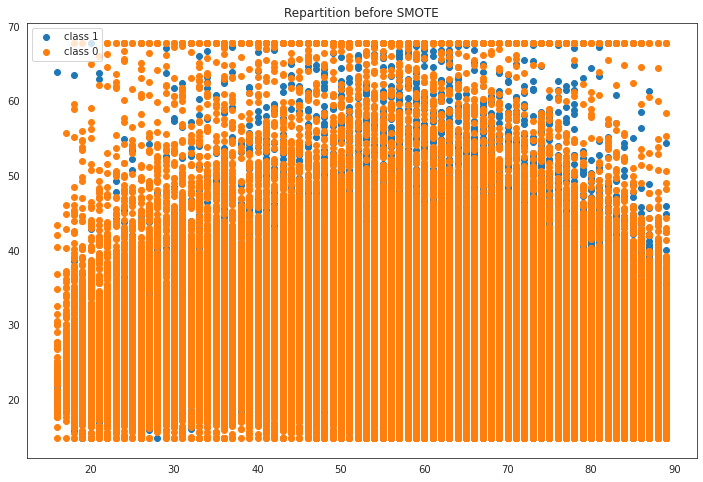

In [48]:
# # Oversample with SMOTE for imbalanced dataset

from collections import Counter
from imblearn.over_sampling import SMOTE


# summarize class distribution
counter = Counter(train_y)
print(counter)

plt.figure(figsize=(12, 8))
plt.title('Repartition before SMOTE')
plt.scatter(train_X[train_y==1].iloc[:, 0], train_X[train_y==1].iloc[:, 1], label='class 1')
plt.scatter(train_X[train_y==0].iloc[:, 0], train_X[train_y==0].iloc[:, 1], label='class 0')
plt.legend();
plt.grid(False);

Counter({1.0: 102006, 0.0: 102006})


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


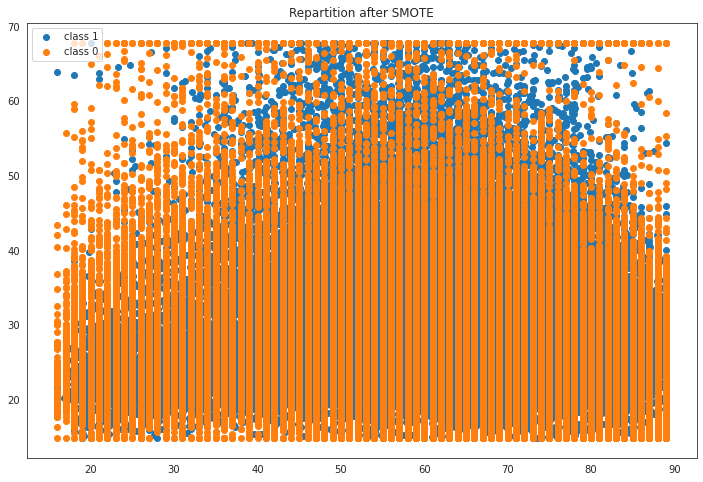

In [49]:
smote = SMOTE()

# transform the dataset
X, y = smote.fit_resample(train_X, train_y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X[y==1].iloc[:, 0], X[y==1].iloc[:, 1], label='class 1')
plt.scatter(X[y==0].iloc[:, 0], X[y==0].iloc[:, 1], label='class 0')
plt.legend();
plt.grid(False);

## Scaling Features

In [50]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [51]:
## scaling numerical columns 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newtr = X.select_dtypes(include=numerics)
numeric_cols = newtr.columns
num = np.delete(numeric_cols, np.where(numeric_cols == 'diabetes_mellitus'))

X[num] = min_max_scaler.fit_transform(X[num])
test_dataset[num] = min_max_scaler.fit_transform(test_dataset[num])

## Saving the training and test datasets

In [52]:
# joining train_X and train_y

X['diabetes_mellitus'] = y

In [53]:
# Saving preprocessed data

X.to_csv('df_train_preprocessed.csv', index=False)
test_dataset.to_csv('df_test_preprocessed.csv', index=False)